In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pzn = pd.read_excel("rent-poznan (1).xlsx")
pzn.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,flat_furnished,flat_rent,flat_deposit,flat_price_include_rent,flat_for_students,flat_heating,flat_status,flat_windows,building_floor_num,building_type,building_material,ad_title,ad_seller_id,ad_promo,flat_balcony,flat_utility_room,flat_garage,flat_basement,flat_garden,flat_tarrace,flat_lift,flat_two_level,flat_kitchen_sep,flat_air_cond,flat_nonsmokers,flat_washmachine,flat_dishwasher,flat_fridge,flat_cooker,flat_oven,flat_tv_device,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,True,360,1400.0,False,True,0.0,0.0,0.0,0,0.0,NaN,"Ładna, kawalerka. BEZPOŚREDNIO.",592916,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,True,0,0.0,False,True,1.0,0.0,0.0,5,1.0,0.0,Apartment in very center of Poznan - direct of...,226529,False,False,True,False,False,False,False,False,False,True,False,False,True,True,True,True,True,False,True,True,True,False,False,True,True,True,False,Stare Miasto


In [ ]:
pzn_sub = pzn.query("price>=500 & price<=15000 & flat_area>=15 & flat_area<=150")
pzn_sub.shape

(16199, 51)

# Tabele przestawne
Będziemy korzystać z funkcji `pd.pivot_table`, która ma następujące argumenty:
+ `data` -- zbiór danych
+ `values` -- kolumna(y) do agregacji
+ `index` -- zmienne grupujące
+ `aggfunc` -- funkcja(e) agregująca(e)


In [ ]:
pd.pivot_table(data=pzn_sub , values = 'price', index = 'flat_rooms', aggfunc = 'mean')
##pzn_sub.pivot_table(values = "price", index = 'flat_rooms', aggfunc='mean')

,price
flat_rooms,
1,1316.650244
2,1760.564434
3,2190.501624
4,2785.335404
5,3188.478261
6,3001.000000
7,875.000000
8,3500.000000
9,1100.000000


In [ ]:
pzn_sub.pivot_table(values = ["price", "flat_area"], index = 'flat_rooms', aggfunc='mean')

,flat_area,price
flat_rooms,,
1,30.508580,1316.650244
2,47.119923,1760.564434
3,64.622232,2190.501624
4,87.561946,2785.335404
5,108.052391,3188.478261
6,106.920000,3001.000000
7,21.500000,875.000000
8,112.000000,3500.000000
9,49.000000,1100.000000


In [ ]:
pzn_sub.pivot_table(values = 'price', index = 'flat_rooms', columns = 'individual', aggfunc = 'count')
##ilośc wystawionych ofert przez osoby nieindywidualne i indywidualne

individual,False,True
flat_rooms,,
1,2973.0,1330.0
2,5692.0,2580.0
3,2226.0,852.0
4,377.0,106.0
5,39.0,7.0
6,8.0,2.0
7,2.0,NaN
8,1.0,NaN
9,1.0,NaN


In [ ]:
pzn_sub.pivot_table(values = 'price', 
                    index = 'flat_rooms', columns = 'individual', 
                    aggfunc = 'count', fill_value = 0)
##podmieniamy NaN za pommocą fill_value

individual,False,True
flat_rooms,,
1,2973,1330
2,5692,2580
3,2226,852
4,377,106
5,39,7
6,8,2
7,2,0
8,1,0
9,1,0


In [ ]:
pzn_sub.pivot_table(values='price', index='individual', aggfunc=np.median)

,price
individual,
False,1600
True,1650


In [ ]:
pzn_sub.pivot_table(values='price', index='individual', aggfunc=[np.median, np.mean])

,median,mean
,price,price
individual,,
False,1600,1761.817523
True,1650,1754.346525


In [ ]:
pzn_sub.pivot_table(values='price', index='flat_for_students', aggfunc=[np.median, np.mean])

,median,mean
,price,price
flat_for_students,,
False,1650,1802.006109
True,1600,1640.252941


liczymy ile jest obserwacji, które spełaniają warunek, że cena jest większa niż 2000

In [ ]:
pzn_sub.pivot_table(values='price', index='flat_for_students', aggfunc = lambda x: sum(x >= 2000))
##wśród nieruchomości nie przeznoczonych dla studentów było ofert 3532 których cena była większa od 2000

,price
flat_for_students,
False,3532
True,827


In [ ]:
pzn_sub.pivot_table(values = 'price',
                    index = 'flat_for_students',
                    aggfunc = { ("średnia", np.mean) })

,mediana,średnia
flat_for_students,,
False,1650.0,1802.006109
True,1600.0,1640.252941


In [ ]:
pzn_sub.pivot_table(values = 'price',
                    index = 'flat_for_students',
                    aggfunc = { ("liczba_2000", lambda x: sum(x>=2000)) })

,liczba_2000
flat_for_students,
False,3532
True,827


In [ ]:
tabela = pzn_sub.pivot_table(values = 'price',
                    index = ['flat_for_students', 'flat_furnished'],
                    aggfunc = { ("liczba_2000", lambda x: sum(x>=2000)), 
                               ("liczba", 'count'), 
                               ('odsetek', lambda x: sum(x >= 2000)/len(x)*100 ), 
                               ('srednia', np.mean) })

In [ ]:
type(tabela)

pandas.core.frame.DataFrame

In [ ]:
tabela

liczba  liczba_2000    odsetek      srednia
flat_for_students flat_furnished                                             
False             False           7612.0       2081.0  27.338413  1752.603389
                  True            4337.0       1451.0  33.456306  1888.714319
True              False            517.0        100.0  19.342360  1628.475822
                  True            3733.0        727.0  19.474953  1641.884008

In [ ]:
tabela.stack().reset_index()

,flat_for_students,flat_furnished,level_2,0
0,False,False,liczba,7612.000000
1,False,False,liczba_2000,2081.000000
2,False,False,odsetek,27.338413
3,False,False,srednia,1752.603389
4,False,True,liczba,4337.000000
5,False,True,liczba_2000,1451.000000
6,False,True,odsetek,33.456306
7,False,True,srednia,1888.714319
8,True,False,liczba,517.000000
9,True,False,liczba_2000,100.000000


##wizualizacja danych z wykorzystaniem biblioteki `seaborn`


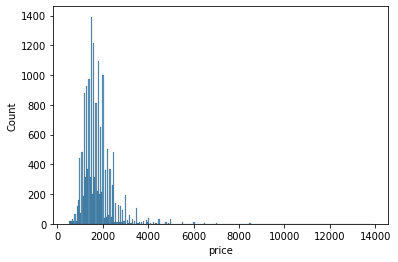

In [ ]:
sns.histplot(data = pzn_sub, x = 'price')

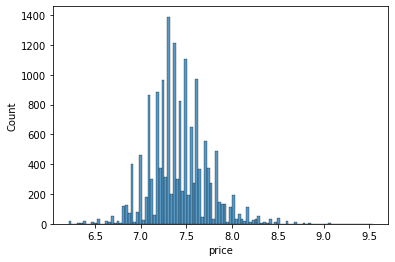

In [ ]:
sns.histplot(x = np.log(pzn_sub.price))

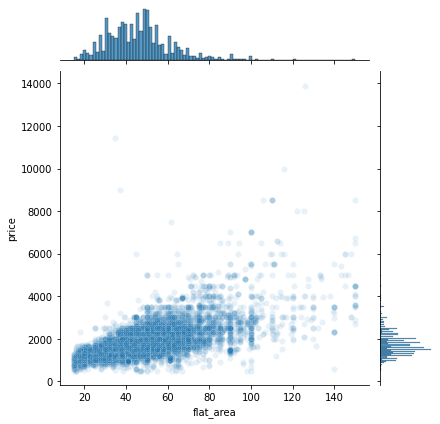

In [ ]:
sns.jointplot(x = pzn_sub.flat_area, y = pzn_sub.price, alpha = 0.1)

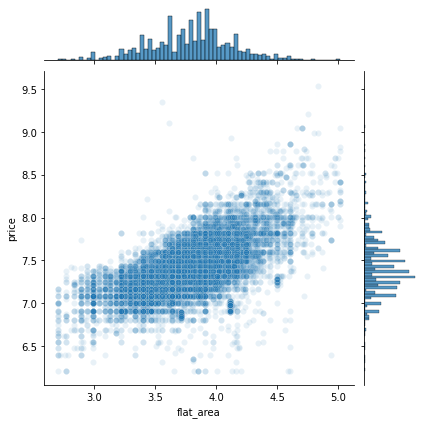

In [ ]:
sns.jointplot(x = np.log(pzn_sub.flat_area), y = np.log(pzn_sub.price), alpha = 0.1)


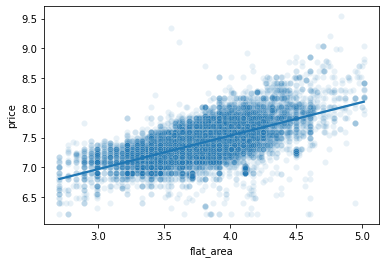

In [ ]:
sns.scatterplot(x = np.log(pzn_sub.flat_area), y = np.log(pzn_sub.price), alpha = 0.1)
sns.regplot(x = np.log(pzn_sub.flat_area), y = np.log(pzn_sub.price), scatter=False)

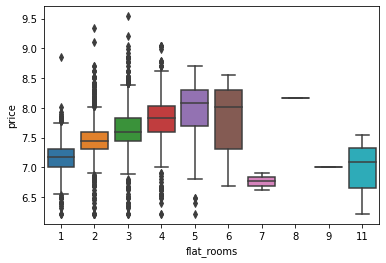

In [ ]:
sns.boxplot(x = pzn_sub.flat_rooms, y=np.log(pzn_sub.price))

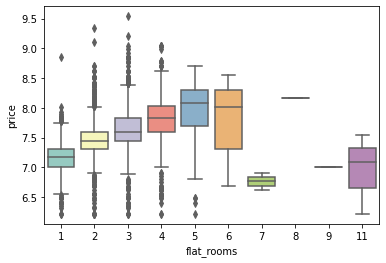

In [ ]:
sns.boxplot(x = pzn_sub.flat_rooms, y=np.log(pzn_sub.price), palette = "Set3") ##https://colorbrewer2.org/#type=sequential&scheme=OrRd&n=3

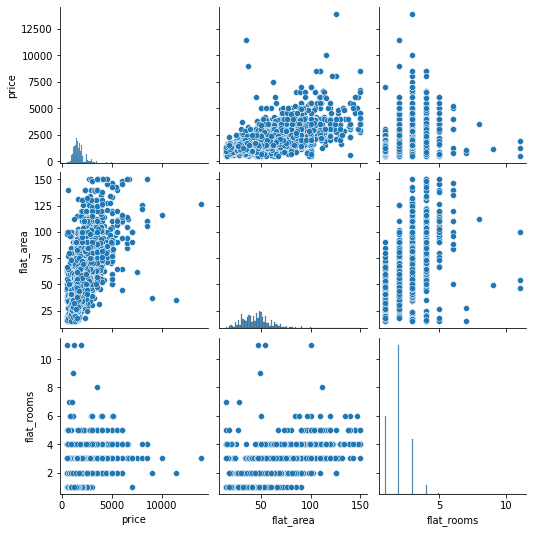

In [50]:
sns.pairplot(data = pzn_sub, vars = ["price", "flat_area", "flat_rooms"])